<a href="https://colab.research.google.com/github/meyounge/MAT422/blob/main/MAT_422_HM1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homwork 1.2 Linear alegbra



1.2.1 Linear Spaces

Create a function that will generate a basis of dimension nxn, then graph a 3x3 basis in space. This function will be useful later as both diagnolizing a matrix and Gram-Schmit will require a set of vectors that spans the full dimentional space.

vectors: 
[[ 9  8 -3]
 [ 9 -7 -6]
 [ 9  6 -1]]


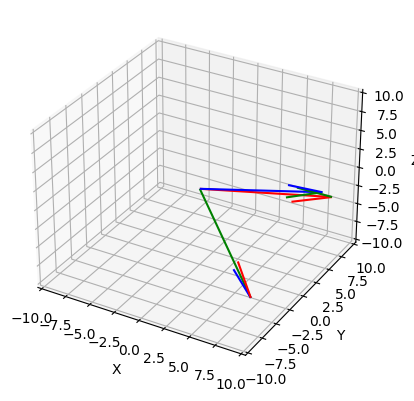

In [225]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# This function will generate a set of vectors that form a basis
def generateBasisVectors(range = [0, 100],dim=3):
  detX = 0
  while detX < 10**-10 and detX > -10**-10: #If it is basically zero will kick due to floating point error
    X = np.random.randint(range[0], range[1], [dim, dim])
    detX = np.linalg.det(X)

  return X


range = [-10, 10]
dim = 3
vectors = generateBasisVectors(range, dim)
print("vectors: ")
print(vectors)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

origin = np.zeros([dim, dim])

# Plot the vectors
ax.quiver(*origin, vectors[:,0], vectors[:,1], vectors[:,2], color=['r', 'g', 'b'])

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set limits
ax.set_xlim(range)
ax.set_ylim(range)
ax.set_zlim(range)

plt.show()

1.2.2 Orthogonality

Find the projection of vector v onto u and prove they are orthoganal by use of the dot and cross products:

In [226]:
#find the projection of vector v onto u
def project(v, u):
  return np.dot(v, u) / np.dot(u, u) * u

v = np.random.randint(0, 100, 3)
u = np.random.randint(0, 100, 3)
p = v - project(v, u)

if np.round(np.dot(p, u), 10) == 0:
  checkdot = True
else:
  checkdot = False

if np.cross(p, u).all(0):
  checkcross = True
else:
  checkcross = False

if checkdot and checkcross:
  print("YAY, successful")
elif checkdot:
  print("checkdot success")
elif checkcross:
  print("checkcross success")
else:
  print("boo, u suk")

print(v)
print(u)
print(p)


YAY, successful
[61 78  8]
[45 54 33]
[  7.1119403   13.33432836 -31.51791045]


1.2.3 Gram–Schmidt process

Code the Gram-Schmidt process for an arbitrary number of dimensions; passed to the function will be a list vectors and returned will be a list of its orthoganol basis counterpart then graph it.

[[72 76 85 26 92]
 [42 36  4 29 26]
 [53 96 47 96 95]
 [91 33 33  6 72]
 [24 75 91 99 59]]
[[ 0.43556443  0.45976246  0.51420801  0.15728716  0.55655456]
 [ 0.46089133  0.2687323  -0.64706183  0.5279214  -0.13406013]
 [-0.70340989  0.11784949  0.03968707  0.66106886  0.22964956]
 [ 0.13984847 -0.66169405 -0.27784272  0.04701747  0.68058516]
 [ 0.28899781 -0.51446468  0.48798511  0.50728401 -0.39539831]]


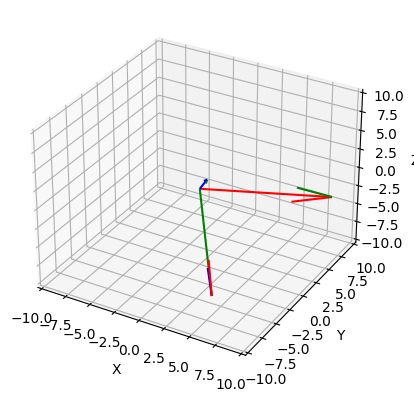

In [228]:
def GramSmidt(vectorsV, norm = True):

  vectorsU = []
  vectorsE = []

  vectorsU.append(vectorsV[0])
  vectorsE.append(vectorsV[0] / np.linalg.norm(vectorsV[0]))

  for v in vectorsV[1:]:
    vec = v
    for u in vectorsU:
      vec = vec - project(vec, u)

    vectorsU.append(vec)
    vectorsE.append(vec / np.linalg.norm(vec))

  if norm:
    return np.array(vectorsE)
  else:
    return np.array(vectorsU)

V = generateBasisVectors(dim=5)

print(V)
print(GramSmidt(V))

#Graphing 3x3 vectors from problem 1
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

vectors_orthanormal = GramSmidt(vectors, False) # from problem 1

# Plot the vectors
ax.quiver(*origin, vectors_orthanormal[:,0], vectors_orthanormal[:,1], vectors_orthanormal[:,2], color=['r', 'g', 'b'])

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set limits
ax.set_xlim(range)
ax.set_ylim(range)
ax.set_zlim(range)

plt.show()


1.2.4 Eigenvalues and eigenvectors

Determine the eigen values of a square matrix and use them to diagonalize the matrix

In [229]:
dim = 5
mat = generateBasisVectors([-10, 10], dim)
#mat = np.array([[3, 7, 7],
#                [2, 1, 8],
#                [6, 8, 0]])

print("starting matrix")
print(mat)
print()

eigVal = np.linalg.eigvals(mat)
from scipy.linalg import null_space

EigenVectors = []
for eig in eigVal:
  X = np.diag(np.full(dim, eig))
  EigenVectors.append(null_space(mat - X).flatten())

print("Eigen Values: ")
print(eigVal)
print()

P = np.array(EigenVectors).T
P_inv = np.linalg.inv(P)
D = np.diag(eigVal)

print("P Matrix: ")
print(P)
print("Diagonal Matrix")
print(D)
print()

print("Should look like the origin matrix P * D * P^-1 = mat")
print(np.round(np.matmul(np.matmul(P, D), P_inv), 3))



starting matrix
[[ 7  1 -9  4 -8]
 [-3 -6 -7 -7  7]
 [-7  9  9 -1  3]
 [-1 -9  3 -2 -8]
 [-5  4  7  4  0]]

Eigen Values: 
[19.56693224+0.j         -7.17926722+2.00207304j -7.17926722-2.00207304j
  1.3958011 +6.77600625j  1.3958011 -6.77600625j]

P Matrix: 
[[-0.69242709-0.j         -0.59900018-0.j         -0.59900018-0.j
  -0.24757774-0.j         -0.24757774-0.j        ]
 [ 0.03499947-0.j          0.42599176-0.16092968j  0.42599176+0.16092968j
  -0.30921047-0.38651306j -0.30921047+0.38651306j]
 [ 0.60367769-0.j         -0.40506292+0.02501995j -0.40506292-0.02501995j
  -0.20918837+0.33643899j -0.20918837-0.33643899j]
 [-0.0436157 -0.j          0.26957394-0.14465547j  0.26957394+0.14465547j
   0.58218705+0.30827048j  0.58218705-0.30827048j]
 [ 0.39114023-0.j         -0.41794122+0.02931387j -0.41794122-0.02931387j
   0.31434476-0.06297422j  0.31434476+0.06297422j]]
Diagonal Matrix
[[19.56693224+0.j          0.        +0.j          0.        +0.j
   0.        +0.j          0.        +0.j 